In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, neural_network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, precision_score ,auc, roc_curve
from sklearn import metrics
# Library for the statistic data vizualisation
import seaborn
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/Ellite Informatique/Desktop/projet_app_sup_20/Datasets_projet_MLDS/creditcard.csv",low_memory=False)

In [3]:
data = data.sample(frac=0.1, random_state = 48)

In [3]:
# Start exploring the dataset
print(data.columns)
data.head()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Print the shape of the data
print(data.shape)

(284807, 31)


L'ensemble de données contient 284 807 transactions decrite par 31 variables, étant donné que presque tous les prédicteurs ont été anonymisés, nous avons decidé de nous concentrer sur l'heure et le montant de la transaction des prédicteurs non anonymisés. 

Nous allons maintenant visualiser toutes les variables de l'ensemble de données sur des graphiques.

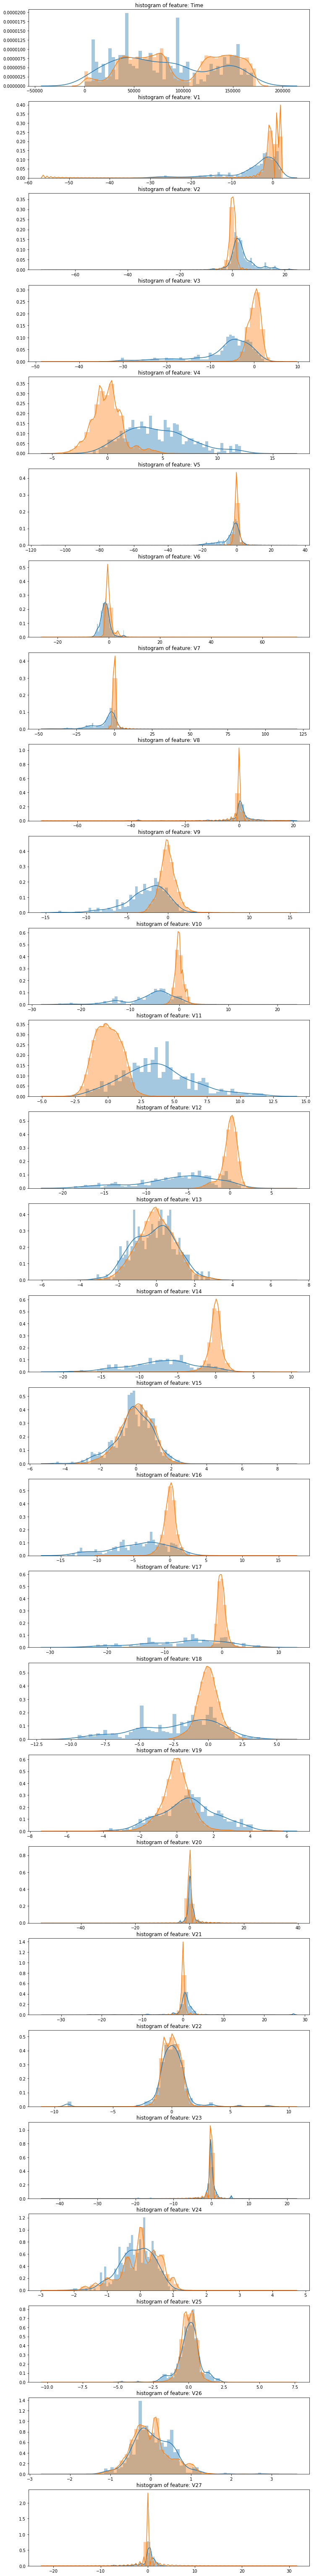

In [20]:
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.Class == 1], bins=50)
 sns.distplot(data[c][data.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [22]:
df_corr = data.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

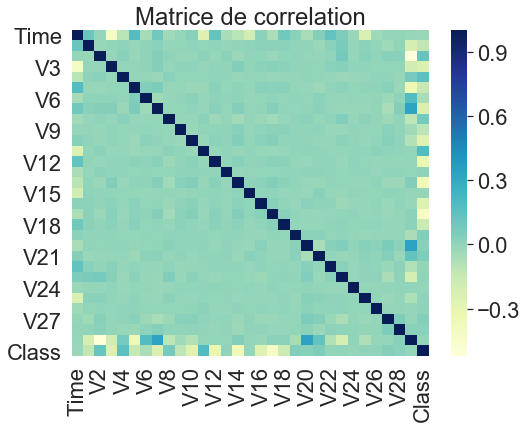

In [29]:
plt.figure(figsize=(8,6))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Matrice de correlation')
plt.show()

Séparons les cas frauduleux des cas authentiques et comparons leurs occurrences dans l'ensemble de données.

In [39]:
# Déterminer le nombre de cas de fraude dans l'ensemble de données 
Fraude = data [data ['Class'] == 1] 
Normal = data [data ['Class'] == 0] 

In [40]:
outlier_fraction = len(Fraude)/float(len(Normal))
print(outlier_fraction)

0.0017304750013189597


fraude Il n'y a que 0,17% de transactions frauduleuses sur toutes les transactions. Les données sont fortement déséquilibrées.

In [32]:
print ("Détails du montant de la transaction frauduleuse") 
Fraude.Amount.describe ()

Détails du montant de la transaction frauduleuse


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Nous avons 492 transactions frauduleuses, leurs montant moyen est de 122.2

In [41]:
print ('détails de la transaction Normale') 
Valide.Amount.describe ()

détails de la transaction Normale


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Nous avons 284315 transactions valide,sauf que le motant est trés petit car mean= 88.2

Les deux classes sont fortement déséquilibrées

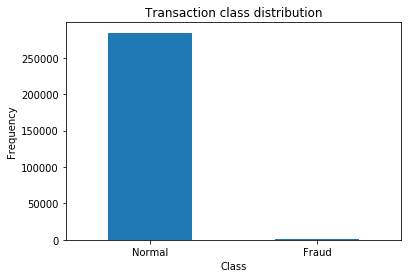

In [38]:
count_classes = pd.value_counts(data['Class'], sort = True)
LABELS = ["Normal", "Fraud"]
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

Distribution des fraudes au cours du temps

C:\Users\Ellite Informatique\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


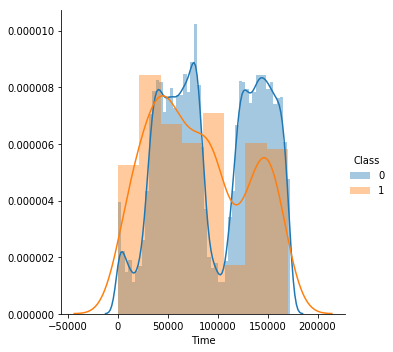

In [16]:
FilteredData = data[['Time','Amount', 'Class']]
sns.FacetGrid(FilteredData, hue="Class", size=5).map(sns.distplot, "Time").add_legend()
plt.show()

Observations:

Il y a un chevauchement important des transactions authentiques et frauduleuses tout au long du temps et il n'y a pas de distinction claire.

Text(0, 0.5, 'Euro')

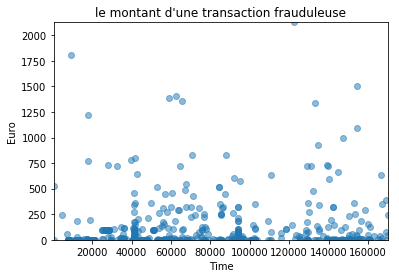

In [48]:

plt.scatter(data['Time'][data.Class==1], data['Amount'][data.Class==1], alpha=0.5)
plt.margins(0)
plt.title("le montant d'une transaction frauduleuse")
plt.xlabel('Time')
plt.ylabel('Euro')

Text(0, 0.5, 'Euro')

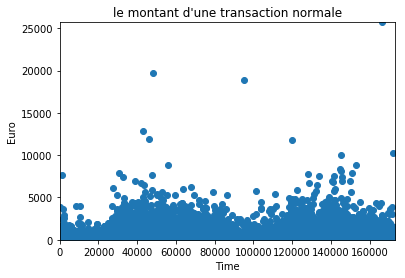

In [49]:
plt.scatter(data['Time'][data.Class==0], data['Amount'][data.Class==0])
plt.margins(0)
plt.title("le montant d'une transaction normale")
plt.xlabel('Time')
plt.ylabel('Euro')

Observations:

D'après les deux graphiques ci-dessus, il est clairement visible qu'il n'y a de fraude que sur les transactions dont le montant de la transaction est inférieur à environ 2500. Les transactions dont le montant de la transaction est supérieur à 2500 environ n'ont pas de fraude.
Selon le temps, Il ne semble pas que le moment de la transaction soit vraiment important, les fraudes dans les transactions sont également réparties dans le temps.

# Séparer les étiquettes des données:


In [4]:
x=data.iloc[:,:-1]
y=data['Class']

In [5]:
scaler = StandardScaler()
scaler.fit(x)
scaled_features = scaler.transform(x)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=101)

# Data Sampling

L'ensemble de données n'est pas équilibré et avec des algorithmes d'apprentissage ils pouvent conduire à une classification erronée de la classe minoritaire. Par conséquent, pour compenser le déséquilibre, nous utiliserons la méthode de suréchantillonnage ADASYN telle qu'implémentée dans le package d'apprentissage déséquilibré pour rééchantillonner l'ensemble de données. ADASYN (ADAptive SYNthetic) est une technique de suréchantillonnage qui génère de manière adaptative des échantillons de données minoritaires en fonction de leurs distributions en utilisant K le plus proche voisin.


In [7]:
from imblearn.over_sampling import ADASYN 
from collections import Counter

Using TensorFlow backend.


In [8]:
# apply the ADASYN over-sampling
ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = ada.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 19896, 1: 40})
Resampled dataset shape Counter({0: 19896, 1: 19880})


In [14]:


def plot_confusion_matrix(cm, classes, title, cmap):
    "function for plotting confusion matrix"
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    classnames = classes
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classnames))
    plt.xticks(tick_marks, classnames, rotation=45)
    plt.yticks(tick_marks, classnames)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()


def plot_roc_auc(arg1, arg2, arg3):
    "a function to plot roc_auc"
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, v in arg1: 
        y_score = v.predict_proba(arg2)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(arg3, y_score) 
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr,lw=2, label= i + ' (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()  

In [11]:
X_train, y_train = X_res, y_res 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);

In [12]:
# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('LogisticRegression', LGR_Classifier),
('Naive Baiye Classifier', BNB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  99.6%

Model Accuracy:  100.0%

Confusion Matrix:
 [[199016      0]
 [     0 198881]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       1.00      1.00      1.00    198881

    accuracy                           1.00    397897
   macro avg       1.00      1.00      1.00    397897
weighted avg       1.00      1.00      1.00    397897




C:\Users\Ellite Informatique\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Ellite Informatique\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

===== LogisticRegression =====

Cross Validation Mean Score:  96.89999999999999%

Model Accuracy:  95.8%

Confusion Matrix:
 [[192525   6491]
 [ 10193 188688]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    199016
           1       0.97      0.95      0.96    198881

    accuracy                           0.96    397897
   macro avg       0.96      0.96      0.96    397897
weighted avg       0.96      0.96      0.96    397897


===== Naive Baiye Classifier =====

Cross Validation Mean Score:  94.19999999999999%

Model Accuracy:  94.3%

Confusion Matrix:
 [[198352    664]
 [ 22114 176767]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95    199016
           1       1.00      0.89      0.94    198881

    accuracy                           0.94    397897
   macro avg       0.95      0.94      0.94    397897
weighted avg       0.95   


========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  100.0%

Confusion Matrix:
 [[85283    16]
 [   23   121]]



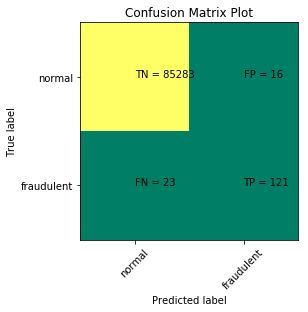


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.88      0.84      0.86       144

    accuracy                           1.00     85443
   macro avg       0.94      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443


=== LogisticRegression ===
Model Accuracy:  96.8%

Confusion Matrix:
 [[82547  2752]
 [   19   125]]



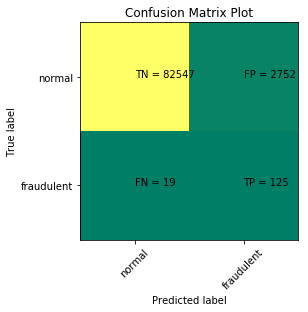


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85299
           1       0.04      0.87      0.08       144

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443


=== Naive Baiye Classifier ===
Model Accuracy:  99.7%

Confusion Matrix:
 [[85050   249]
 [   23   121]]



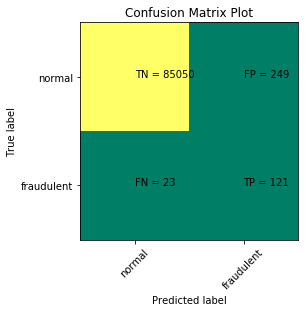


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.33      0.84      0.47       144

    accuracy                           1.00     85443
   macro avg       0.66      0.92      0.73     85443
weighted avg       1.00      1.00      1.00     85443


============================= ROC Curve ===============================



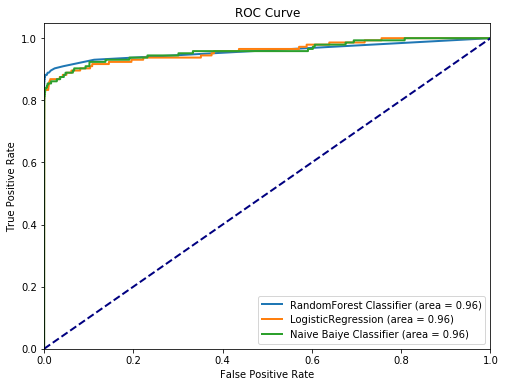

In [17]:
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

print('============================= ROC Curve ===============================' "\n")      
plot_roc_auc(arg1=models, arg2=X_test, arg3=y_test)

In [20]:
MLA = [
    tree.DecisionTreeClassifier(max_depth=3),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    neural_network.MLPClassifier(alpha=1)
]

In [23]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    
    row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare

,MLA Name,Precision,AUC
1,QuadraticDiscriminantAnalysis,0.054112,0.927959
0,DecisionTreeClassifier,0.087881,0.923012
2,MLPClassifier,0.237354,0.921313


In [9]:
# Nous définissons un classificateur SVM, le classificateur SVM par défaut (Kernel = Radial Basis Function)
classifier = svm.SVC(kernel='linear')

In [10]:
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
#et finallement on predit notre data test.
prediction_SVM_all = classifier.predict(X_test) 

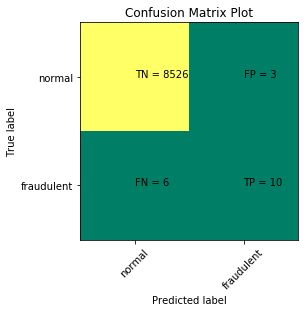

In [16]:
classdict = {'normal':0, 'fraudulent':1}
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)

In [18]:
print('Notre critère donne un résultat de ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))


Notre critère donne un résultat de 0.6997893504973669


In [21]:
print('Nous avons detecter ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total des fraudes.')
print('\n donc, la probabilité que la fraude soit detecter est: ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("la précision est de : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))


Nous avons detecter 10 frauds / 16 total des fraudes.

 donc, la probabilité que la fraude soit detecter est: 0.625
la précision est de : 0.9989467524868344
